In [5]:
load("Daten/catheter.rda")

In [6]:
fits1 <- lm(catlength ~ height, data = catheter)
fits2 <- lm(catlength ~ weight, data = catheter)
summary(fits1)


Call:
lm(formula = catlength ~ height, data = catheter)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0929 -0.7298 -0.2608  1.1652  6.6879 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.12706    4.24700   2.855 0.017090 *  
height       0.23774    0.04034   5.893 0.000152 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.009 on 10 degrees of freedom
Multiple R-squared:  0.7764,	Adjusted R-squared:  0.7541 
F-statistic: 34.73 on 1 and 10 DF,  p-value: 0.0001525


In [7]:
summary(fits2)


Call:
lm(formula = catlength ~ weight, data = catheter)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.9676 -1.4963 -0.1386  2.0980  7.0205 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 25.62631    2.00264  12.796 1.59e-07 ***
weight       0.61613    0.09759   6.313 8.75e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.797 on 10 degrees of freedom
Multiple R-squared:  0.7994,	Adjusted R-squared:  0.7794 
F-statistic: 39.86 on 1 and 10 DF,  p-value: 8.755e-05


In [8]:
fit <- lm(catlength ~ height + weight, data = catheter)
summary(fit)


Call:
lm(formula = catlength ~ height + weight, data = catheter)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.0497 -1.2753 -0.2595  1.9095  6.9933 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept) 21.08527    8.77037   2.404   0.0396 *
height       0.07681    0.14412   0.533   0.6070  
weight       0.42752    0.36810   1.161   0.2753  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.94 on 9 degrees of freedom
Multiple R-squared:  0.8056,	Adjusted R-squared:  0.7624 
F-statistic: 18.65 on 2 and 9 DF,  p-value: 0.0006301


In [9]:
newdat <- data.frame(height = 120, weight = 25)
predict(fits1, newdata = newdat, interval = "prediction")

,fit,lwr,upr
1,40.65609,31.20891,50.10327


In [10]:
predict(fits2, newdata = newdat, interval = "prediction")

,fit,lwr,upr
1,41.02954,32.06162,49.99747


In [11]:
predict(fit, newdata = newdat, interval = "prediction")

,fit,lwr,upr
1,40.99072,31.53989,50.44154


# Exercise 2

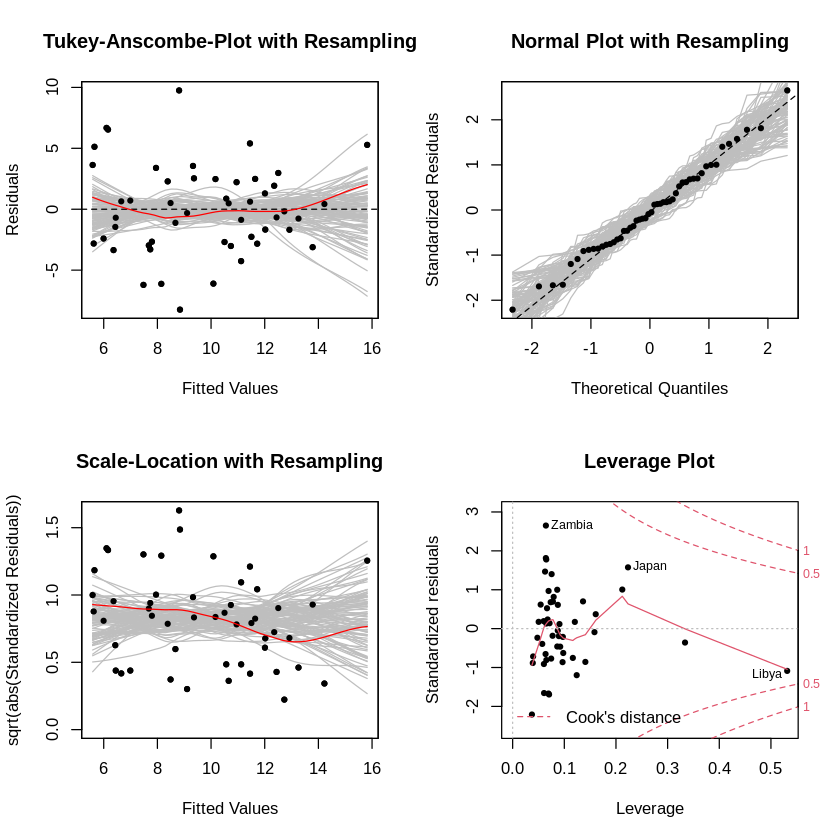

In [13]:
## Load data
load("Daten/savings.rda")
source("resplot.R")
## Model without transformations
fit <- lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings)
## Residuals and Cook's Distance
par(mfrow = c(2, 2))
resplot(fit)

In [14]:
sort(hatvalues(fit), decreasing = TRUE)[1:3]

Libya United States         Japan 
    0.5314568     0.3336880     0.2233099

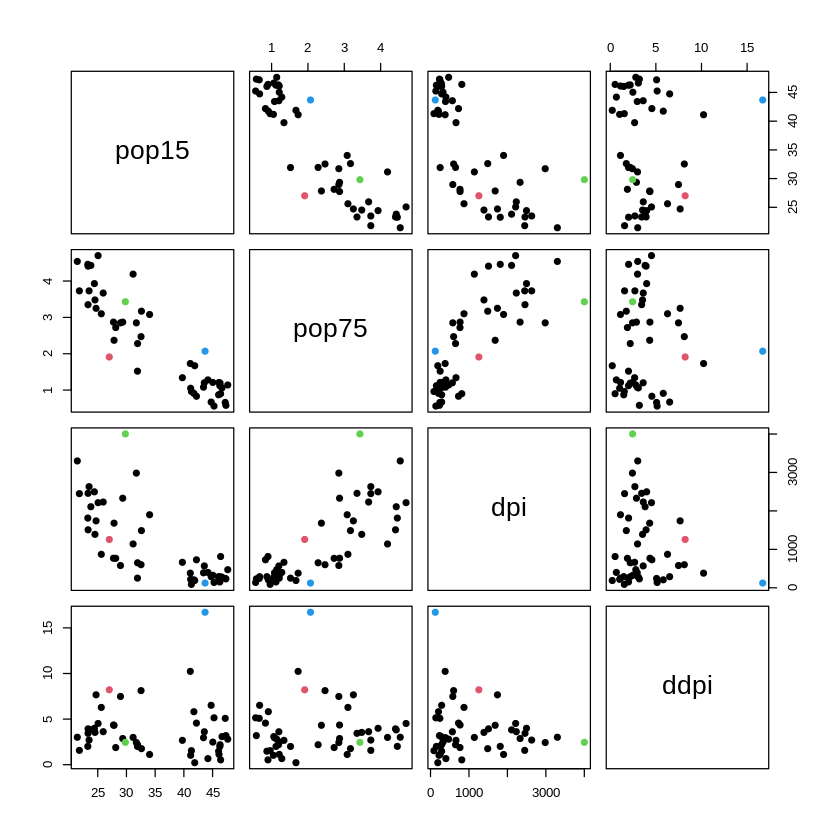

In [15]:
weli <- which(rownames(savings) %in% c("Libya", "United States","Japan"))
farb <- rep(1, nrow(savings))
farb[weli] <- c(2, 3, 4)
## Japan (red), USA (green), Libya (blue)
pairs(savings[, -1], pch = 19, col = farb)


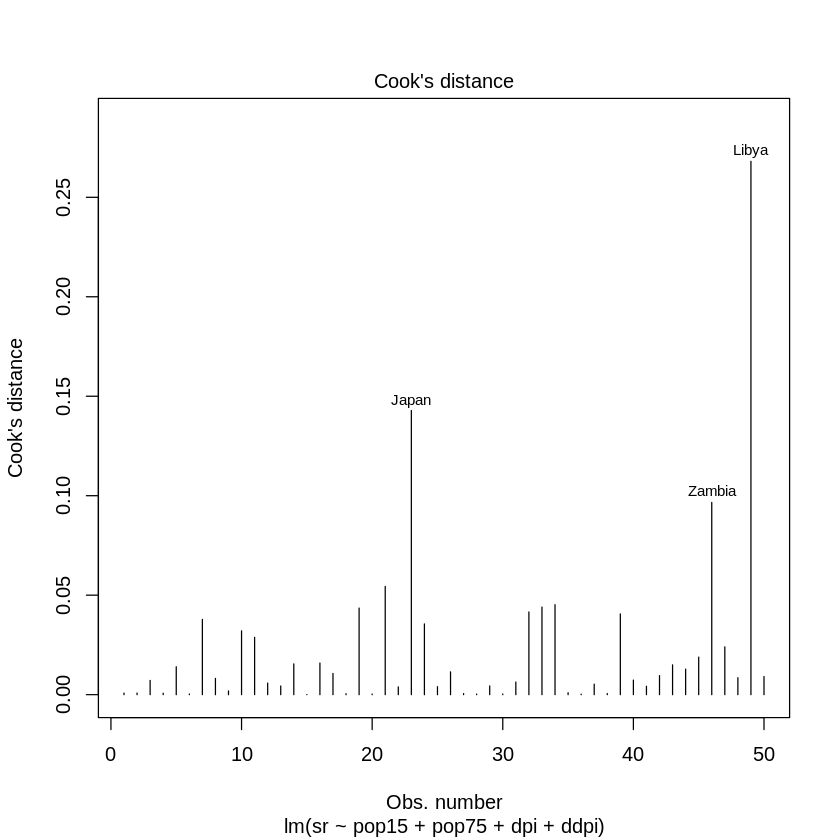

In [16]:
plot(fit, which = 4) ## exclude Libya

In [17]:
weli <- which(rownames(savings) == "Libya")
fit1 <- lm(sr ~ pop15 + pop75 + dpi + ddpi, data = savings[-weli,])
## Comparison of the estimated coefficient
coef(fit)


(Intercept)         pop15         pop75           dpi          ddpi 
28.5660865407 -0.4611931471 -1.6914976767 -0.0003369019  0.4096949279

In [18]:
coef(fit1)


(Intercept)         pop15         pop75           dpi          ddpi 
24.5240459788 -0.3914401268 -1.2808669233 -0.0003189001  0.6102790264

In [19]:
summary(fit)



Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.2422 -2.6857 -0.2488  2.4280  9.7509 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 28.5660865  7.3545161   3.884 0.000334 ***
pop15       -0.4611931  0.1446422  -3.189 0.002603 ** 
pop75       -1.6914977  1.0835989  -1.561 0.125530    
dpi         -0.0003369  0.0009311  -0.362 0.719173    
ddpi         0.4096949  0.1961971   2.088 0.042471 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.803 on 45 degrees of freedom
Multiple R-squared:  0.3385,	Adjusted R-squared:  0.2797 
F-statistic: 5.756 on 4 and 45 DF,  p-value: 0.0007904


In [20]:
summary(fit1)


Call:
lm(formula = sr ~ pop15 + pop75 + dpi + ddpi, data = savings[-weli, 
    ])

Residuals:
    Min      1Q  Median      3Q     Max 
-8.0699 -2.5408 -0.1584  2.0934  9.3732 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)   
(Intercept) 24.5240460  8.2240263   2.982  0.00465 **
pop15       -0.3914401  0.1579095  -2.479  0.01708 * 
pop75       -1.2808669  1.1451821  -1.118  0.26943   
dpi         -0.0003189  0.0009293  -0.343  0.73312   
ddpi         0.6102790  0.2687784   2.271  0.02812 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.795 on 44 degrees of freedom
Multiple R-squared:  0.3554,	Adjusted R-squared:  0.2968 
F-statistic: 6.065 on 4 and 44 DF,  p-value: 0.0005617


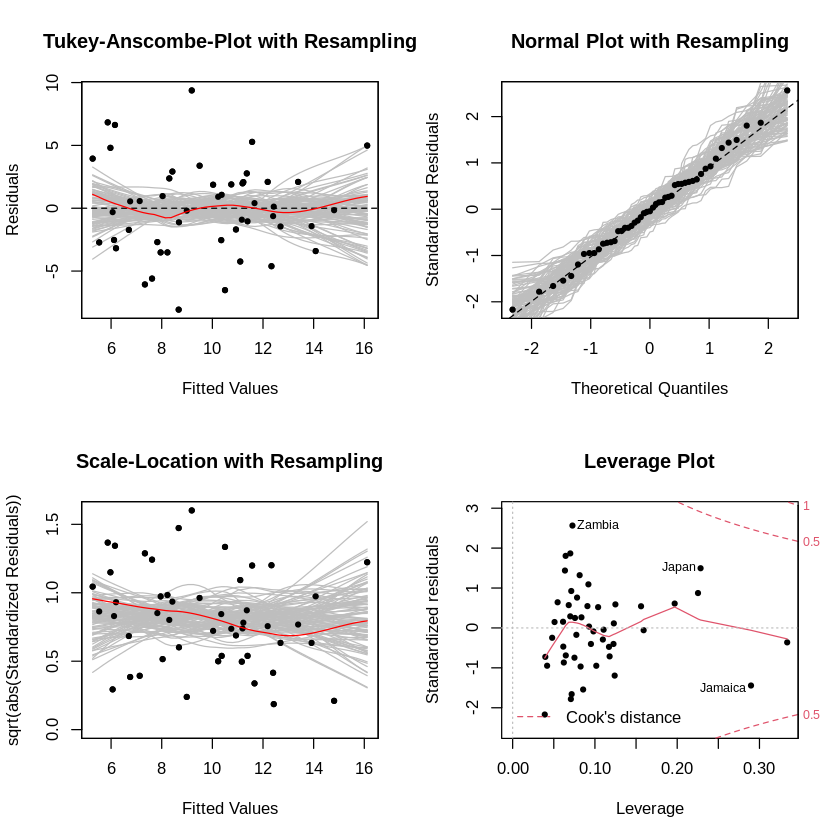

In [21]:
par(mfrow = c(2, 2))
resplot(fit1)

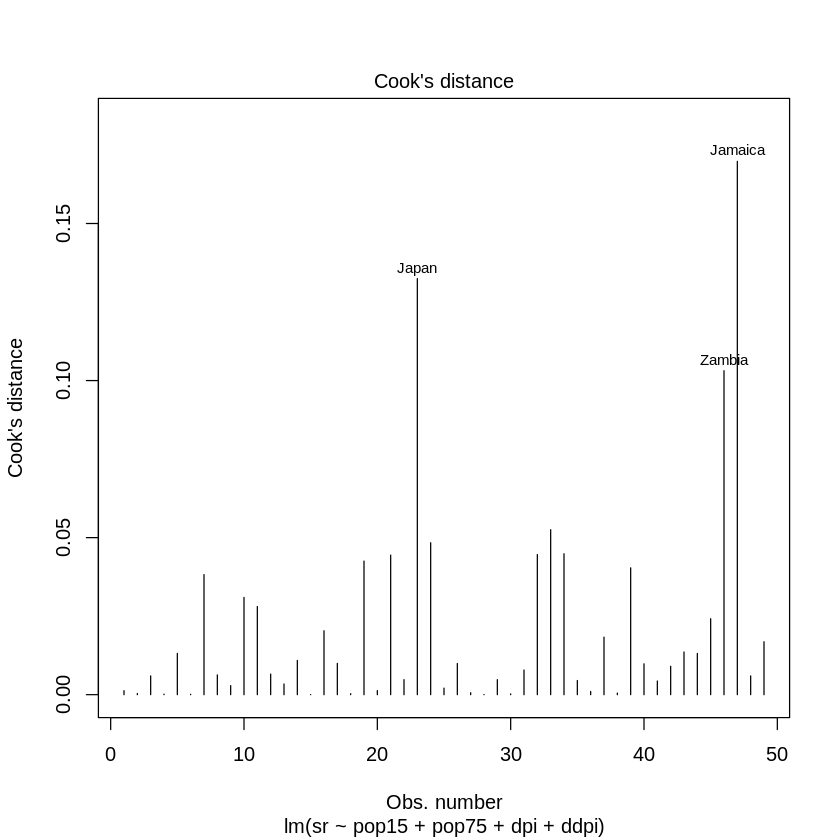

In [22]:
par(mfrow = c(1, 1))
plot(fit1, 4, pch = 20)

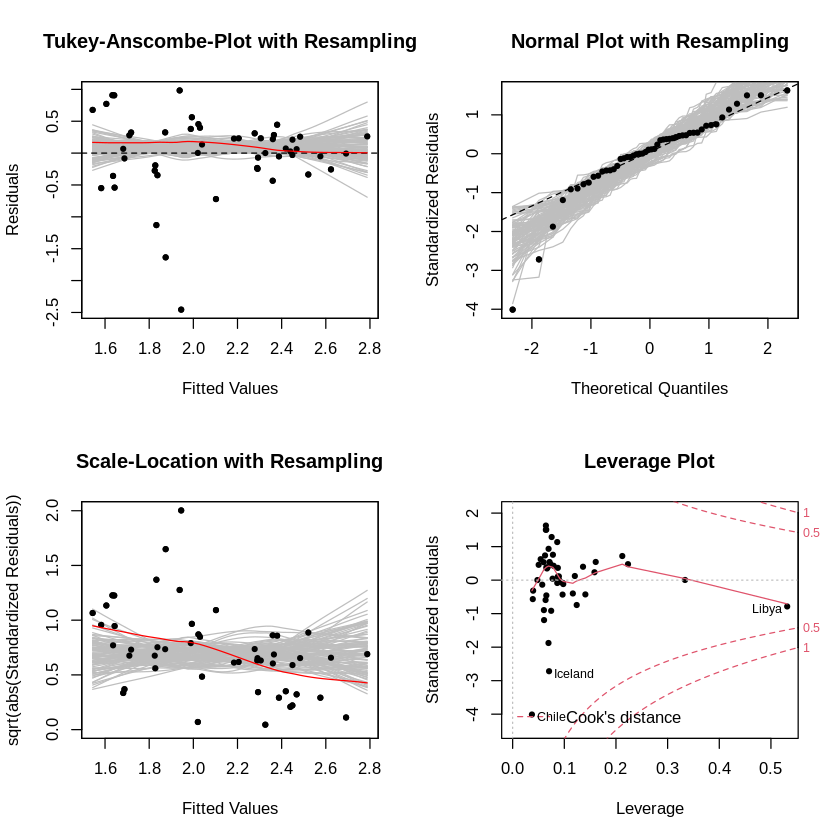

In [23]:
fit2 <- lm(log(sr) ~ pop15 + pop75 + dpi + ddpi, data = savings)
resplot(fit2)

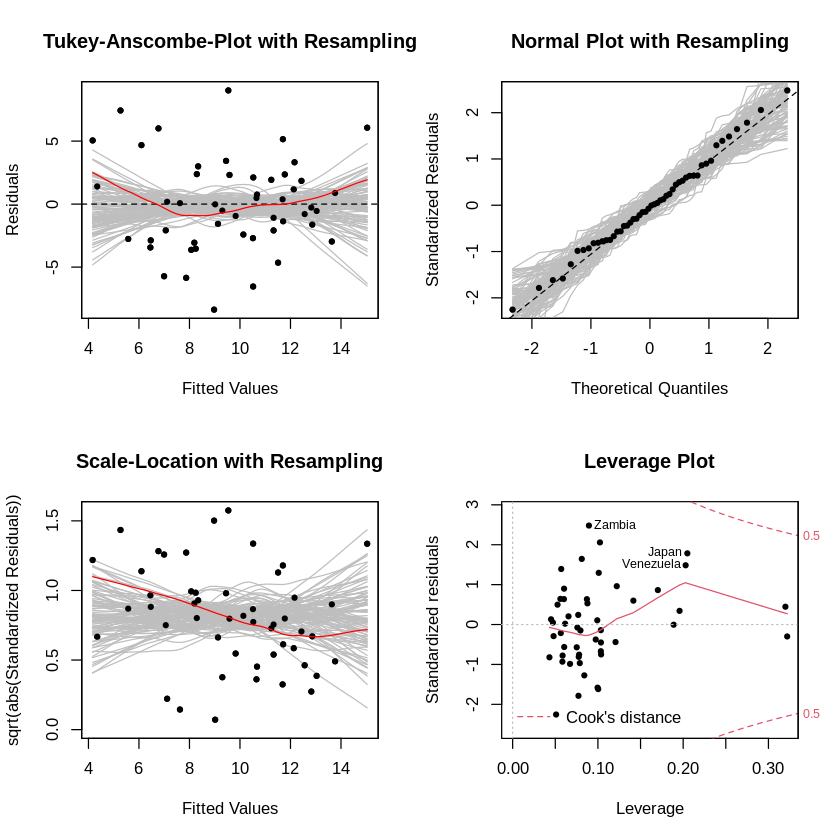

In [26]:
fit3 <- lm(sr ~ pop15 + pop75 + log(dpi) + log(ddpi), data = savings)
resplot(fit3)

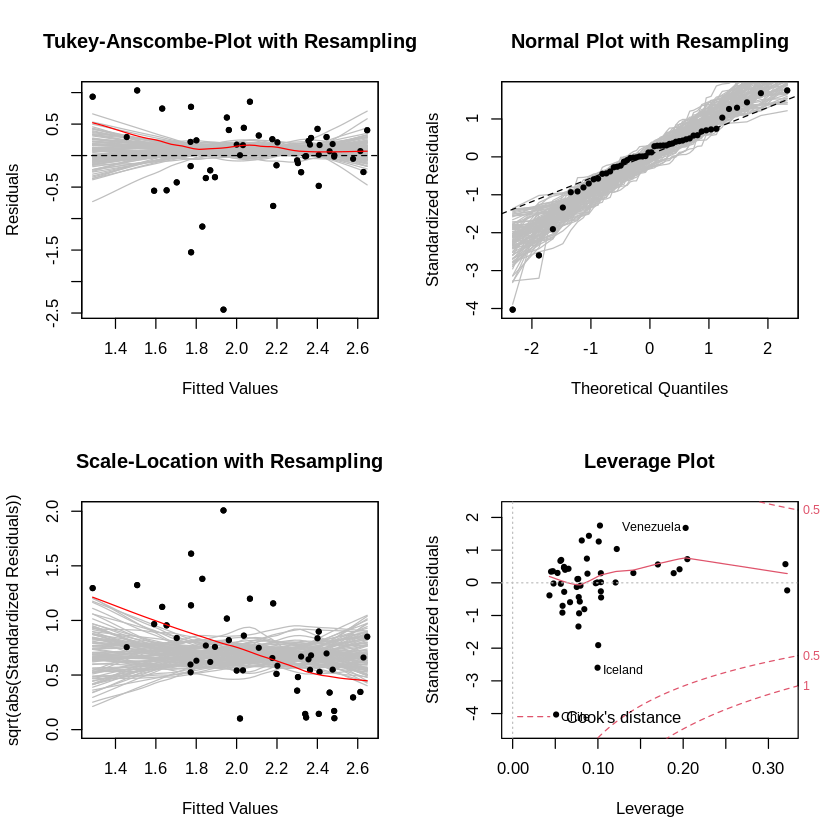

In [27]:
fit4 <- lm(log(sr) ~ pop15 + pop75 + log(dpi) + log(ddpi),
data = savings)
resplot(fit4)


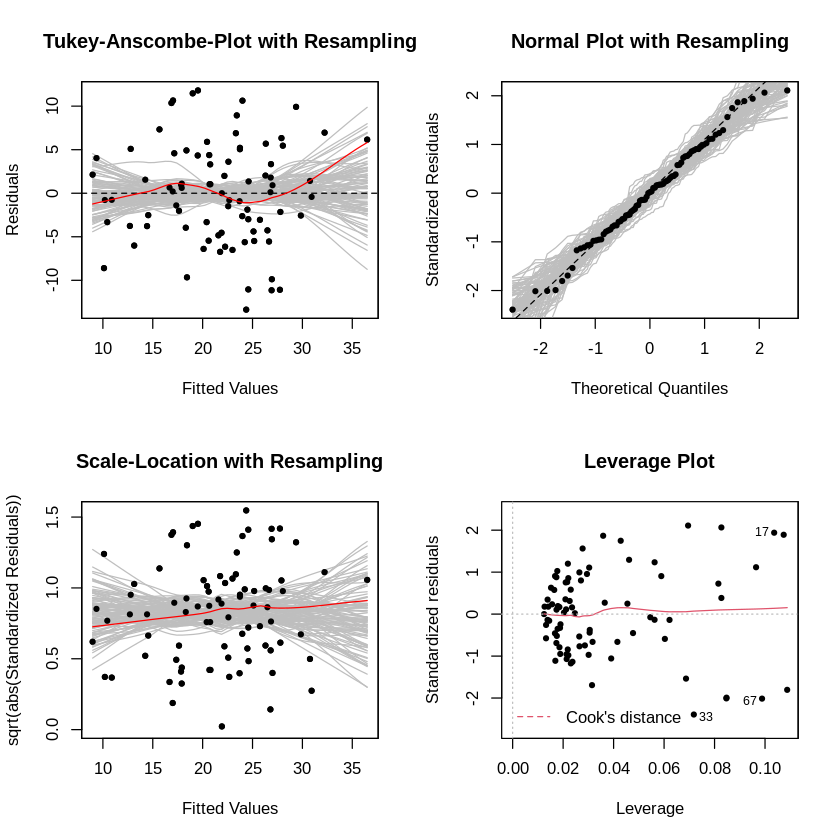

In [28]:
load("Daten/synthetisch.rda")
source("resplot.R")
## fit
fit <- lm(y ~ x1 + x2, data = synthetisch)
par(mfrow = c(2, 2))
resplot(fit)


In [29]:
summary(fit)



Call:
lm(formula = y ~ x1 + x2, data = synthetisch)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.3668  -3.8685   0.1167   4.3564  11.8021 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  72.9020     9.6482   7.556 5.96e-11 ***
x1           -2.0837     0.4882  -4.268 5.37e-05 ***
x2            1.4258     0.1828   7.802 1.98e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.799 on 80 degrees of freedom
Multiple R-squared:  0.4963,	Adjusted R-squared:  0.4837 
F-statistic: 39.41 on 2 and 80 DF,  p-value: 1.226e-12


In [30]:
data <- read.table("Daten/lathe.dat", sep = "", header = TRUE)
summary(data)

       Q               S             CTT           
 Min.   :31.23   Min.   :200.0   Length:20         
 1st Qu.:33.81   1st Qu.:223.2   Class :character  
 Median :39.77   Median :236.0   Mode  :character  
 Mean   :40.83   Mean   :235.2                     
 3rd Qu.:47.82   3rd Qu.:248.5                     
 Max.   :52.26   Max.   :265.0                     

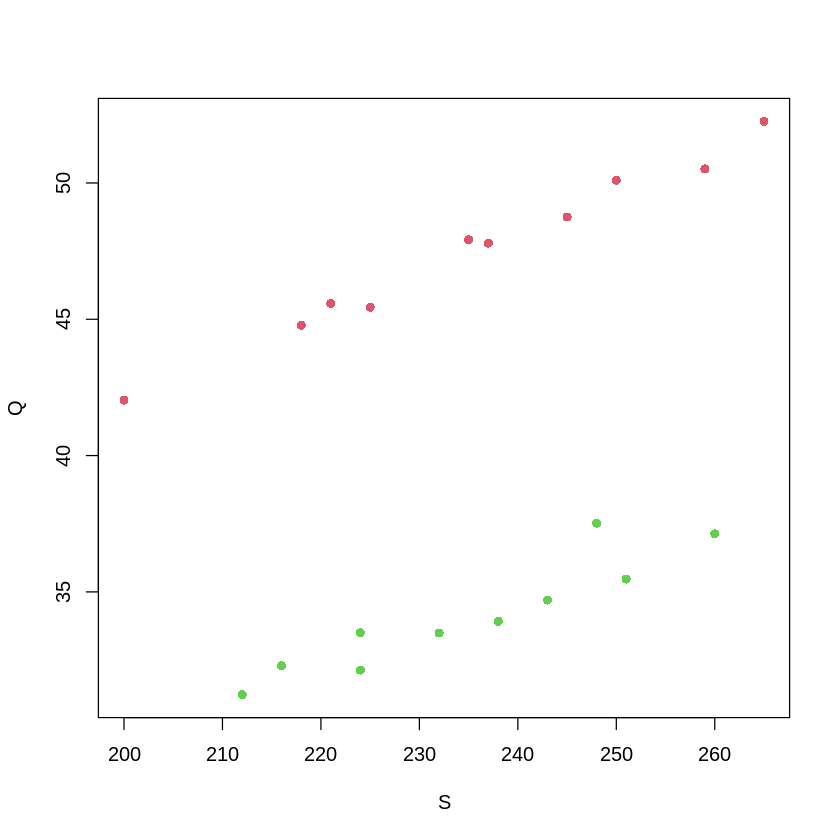

In [31]:
plot(Q ~ S, data = data, col = as.integer(as.factor(CTT)) + 1, pch = 16)


In [32]:
data.lm1 <- lm(Q ~ S + CTT, data = data)
summary(data.lm1)



Call:
lm(formula = Q ~ S + CTT, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-0.9546 -0.5039 -0.1804  0.4893  1.5188 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  14.276196   2.091214   6.827 2.94e-06 ***
S             0.141150   0.008833  15.979 1.13e-11 ***
CTTDM416    -13.280195   0.302879 -43.847  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6771 on 17 degrees of freedom
Multiple R-squared:  0.9924,	Adjusted R-squared:  0.9915 
F-statistic:  1104 on 2 and 17 DF,  p-value: < 2.2e-16


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


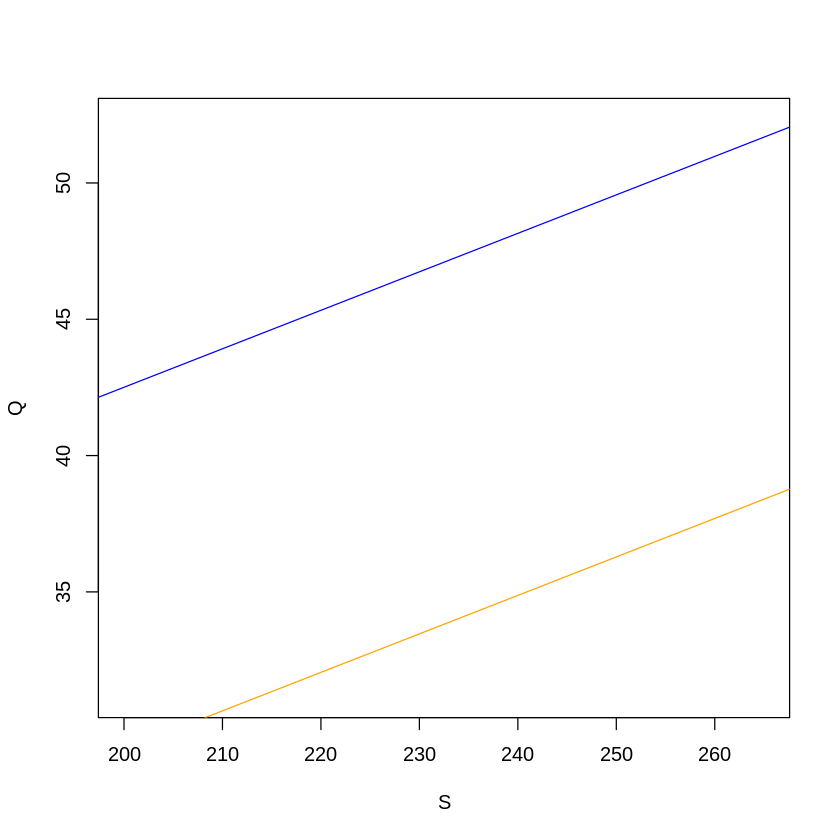

In [33]:
plot(Q ~ S, data = data, col = as.integer(CTT) + 1, pch = 16)
abline(coef(data.lm1)[1:2], col = "blue")
abline(coef(data.lm1)[1:2] + c(coef(data.lm1)[3], 0), col = "orange")

In [34]:
data.lm2 <- lm(Q ~ S * CTT, data = data)
summary(data.lm2)


Call:
lm(formula = Q ~ S * CTT, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.68655 -0.44881 -0.07609  0.30171  1.76690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 11.50294    2.50430   4.593   0.0003 ***
S            0.15293    0.01060  14.428 1.37e-10 ***
CTTDM416    -6.09423    4.02457  -1.514   0.1495    
S:CTTDM416  -0.03057    0.01708  -1.790   0.0924 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.6371 on 16 degrees of freedom
Multiple R-squared:  0.9936,	Adjusted R-squared:  0.9924 
F-statistic: 832.3 on 3 and 16 DF,  p-value: < 2.2e-16


Warning message in FUN(X[[i]], ...):
“NAs introduced by coercion”


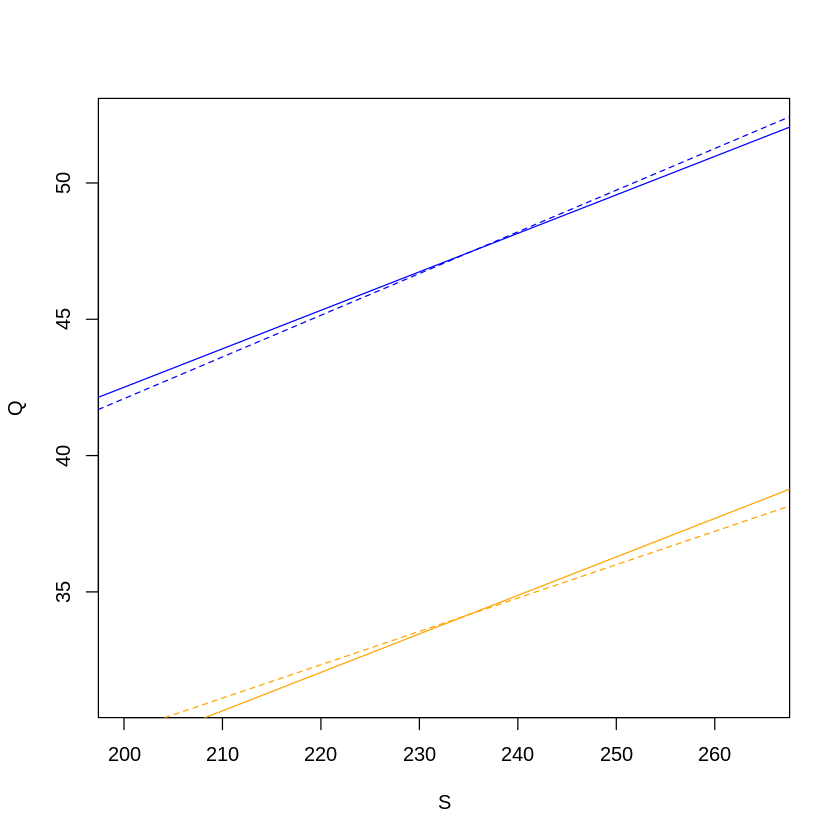

In [36]:
plot(Q ~ S, data = data, col = as.integer(CTT) + 1, pch = 16)
abline(coef(data.lm1)[1:2], col = "blue")
abline(coef(data.lm1)[1:2] + c(coef(data.lm1)[3], 0), col = "orange")
abline(coef(data.lm2)[1:2], col = "blue", lty = 2)
abline(coef(data.lm2)[1:2] + coef(data.lm2)[3:4], col = "orange", lty = 2)


In [37]:
## Load data
load("Daten/farm.rda")
## Check properties of the data
str(farm)

'data.frame':	451 obs. of  4 variables:
 $ region  : int  111 111 111 111 111 111 111 111 111 111 ...
 $ industry: int  3 5 2 1 2 5 2 3 3 3 ...
 $ costs   : int  115096 75443 378857 433590 347417 327745 714462 221258 241868 194837 ...
 $ revenue : int  147652 82920 442726 649628 407836 472569 576372 241864 339215 356625 ...


In [39]:
farm$region <- factor(farm$region)
farm$industry <- factor(farm$industry, labels = c("wheat", "wheat_sheep_cattle", "sheep", "cattle", "sheep_cattle"))

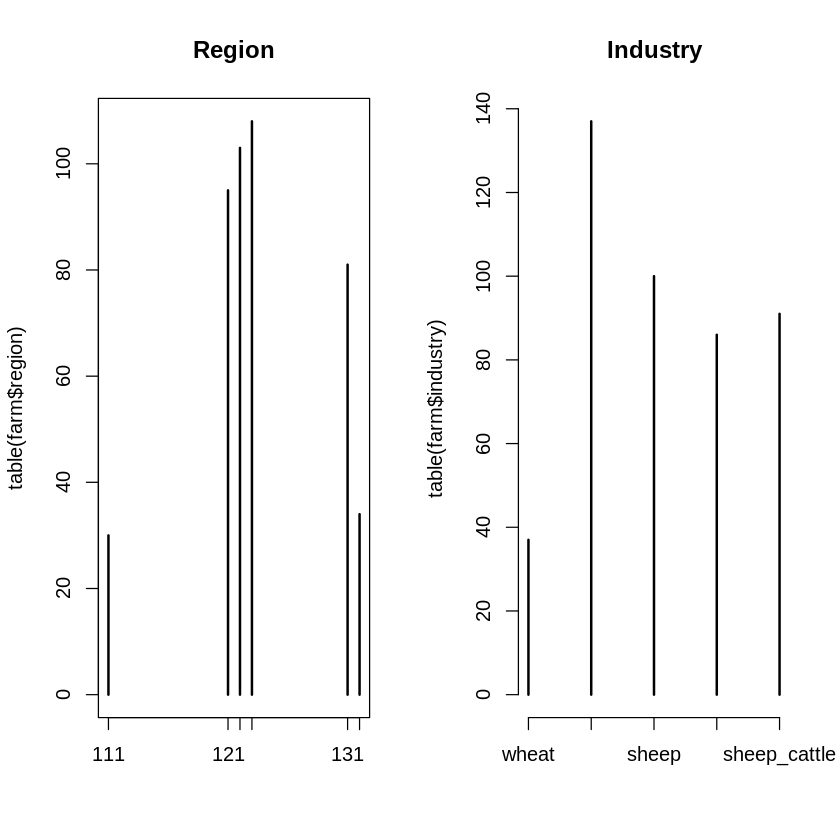

In [40]:
par(mfrow = c(1, 2))
plot(table(farm$region), main = "Region")
plot(table(farm$industry), main = "Industry")

In [41]:
fit1 <- lm(revenue ~ costs + region + industry, data = farm)

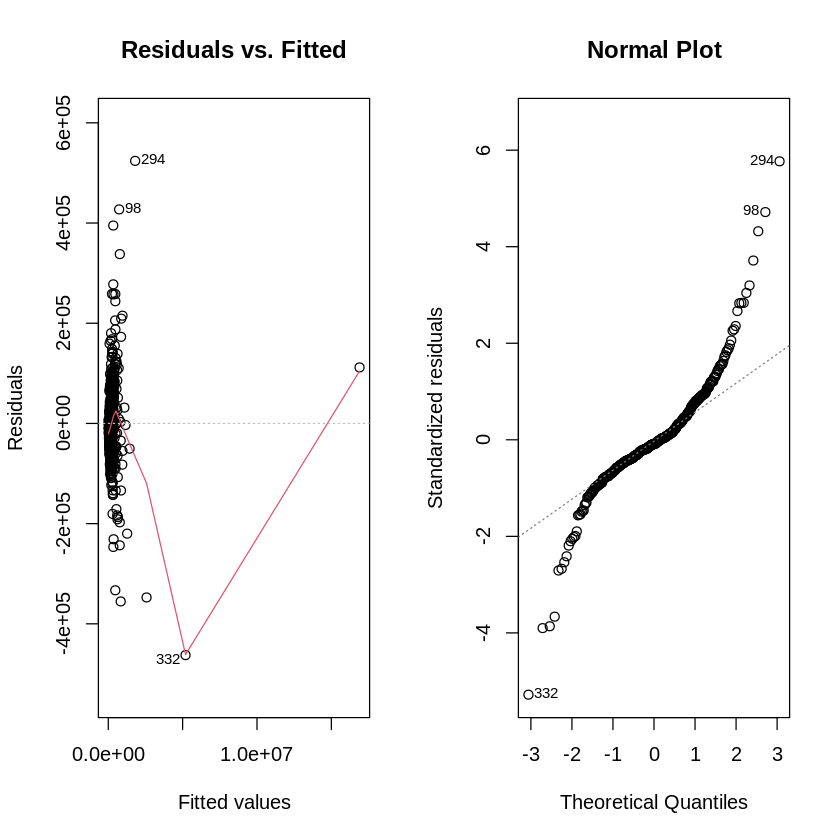

In [42]:
par(mfrow = c(1, 2))
plot(fit1, which = 1, caption = "", main = "Residuals vs. Fitted")
plot(fit1, which = 2, caption = "", main = "Normal Plot")

In [43]:
fit <- lm(log(revenue) ~ log(costs) + region + industry,
data = farm)
summary(fit)


Call:
lm(formula = log(revenue) ~ log(costs) + region + industry, data = farm)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.43881 -0.17143  0.03773  0.22168  1.47317 

Coefficients:
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 1.379636   0.248432   5.553 4.86e-08 ***
log(costs)                  0.917954   0.018617  49.306  < 2e-16 ***
region121                  -0.076883   0.077353  -0.994  0.32081    
region122                  -0.082997   0.076912  -1.079  0.28113    
region123                  -0.036680   0.076151  -0.482  0.63027    
region131                  -0.003855   0.079775  -0.048  0.96148    
region132                  -0.243938   0.100536  -2.426  0.01565 *  
industrywheat_sheep_cattle -0.155614   0.068023  -2.288  0.02263 *  
industrysheep              -0.222879   0.071421  -3.121  0.00192 ** 
industrycattle              0.002649   0.075844   0.035  0.97215    
industrysheep_cattle       -0.171106   0.0

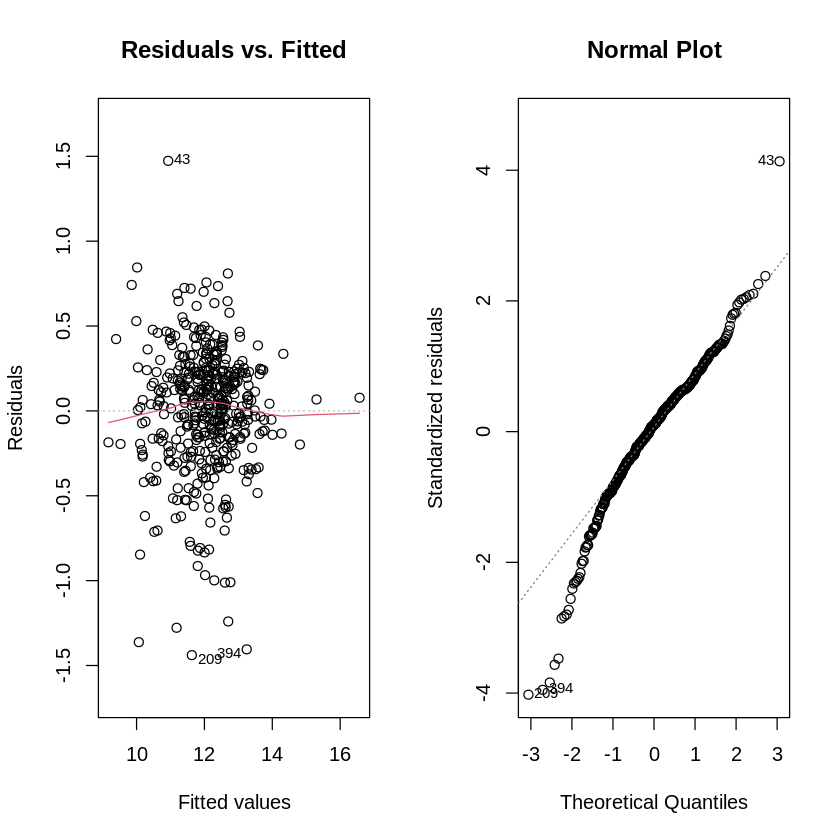

In [44]:
par(mfrow = c(1, 2))
plot(fit, which = 1, caption = "", main = "Residuals vs. Fitted")
plot(fit, which = 2, caption = "", main = "Normal Plot")

In [46]:
## predict
newdat <- data.frame(costs = 10^5, region = "111", industry = "cattle")
predi <- predict(fit, newdata = newdat)
exp(predi)


1 
154914.2

In [47]:
exp(predi + 0.5 * summary(fit)$sigma^2)


1 
165357.7

In [48]:
drop1(fit, test = "F")


,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,57.41101,-907.61530,NA,NA
log(costs),1,317.207862,374.61887,-63.68674,2431.092268,2.541722e-181
region,5,1.363906,58.77491,-907.02624,2.090604,6.550739e-02
industry,4,2.766513,60.17752,-894.38997,5.300664,3.542108e-04


In [49]:
f.big <- lm(log(revenue) ~ log(costs) + region + industry + region * industry, data = farm)
f.small <- lm(log(revenue) ~ log(costs) + region + industry, data = farm)

In [50]:
anova(f.small, f.big)

,Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,440,57.41101,NA,NA,NA,NA
2,420,54.54043,20,2.870583,1.105276,0.3404492


In [51]:
drop1(f.big, test = "F")

,Df,Sum of Sq,RSS,AIC,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,NA,54.54043,-890.74885,NA,NA
log(costs),1,303.466942,358.00737,-44.14211,2336.910900,1.045538e-173
region:industry,20,2.870583,57.41101,-907.61530,1.105276,3.404492e-01
